# SFR-Stellar Mass-Size Paper

These is the notebook for the MS-paper


In [33]:
import numpy as np
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Stellar Mass limit

We need to decide what our stellar mass limit will be.  We need to think about this because at a given absolute magnitude limit, the lowest SFR objects will have the highest $M_*/L$ and hence the highest $M_*$.  Converseley at a fixed $M_*$ cut, the lowest SFR objects will be the faintest.  So, if we make our $M_*$ cut too low, objects with low SFR will fall below our detection limit.

Could cause a bias such that we miss the most suppressed SF-galaxies, or those with the smallest 24um disks?

In [49]:
run ~/github/LCS/python/Python3/LCS_MSpaper.py

normalizing by radius of disk
(1800, 1800)


## Different selection cuts

This shows how all the different selection cuts manifest themselves in the SFR-$M_*$ plane.  In all plots, red are the objects removed by the flag.

The first plot is for all the galaxies and the second and third are separated by core and exterior.

The horizontal green line is the SFR corresponding to our LIR limit.  I took the 0.086 from Elbaz and divided it by 1.74 to convert to Chabrier (Salim+16).

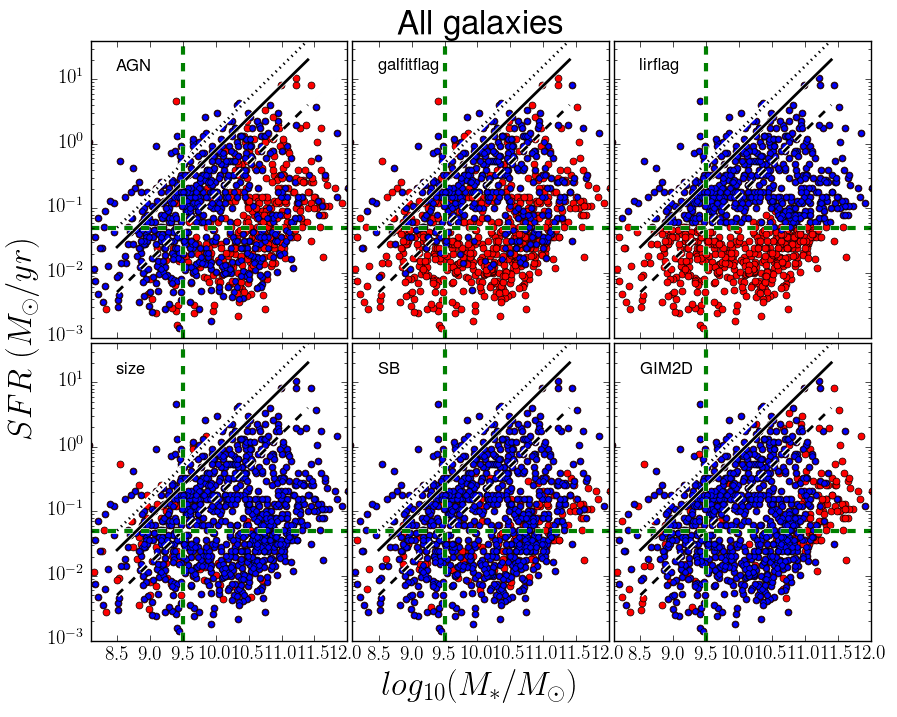

In [44]:
g.plotSFRStellarmasssel()

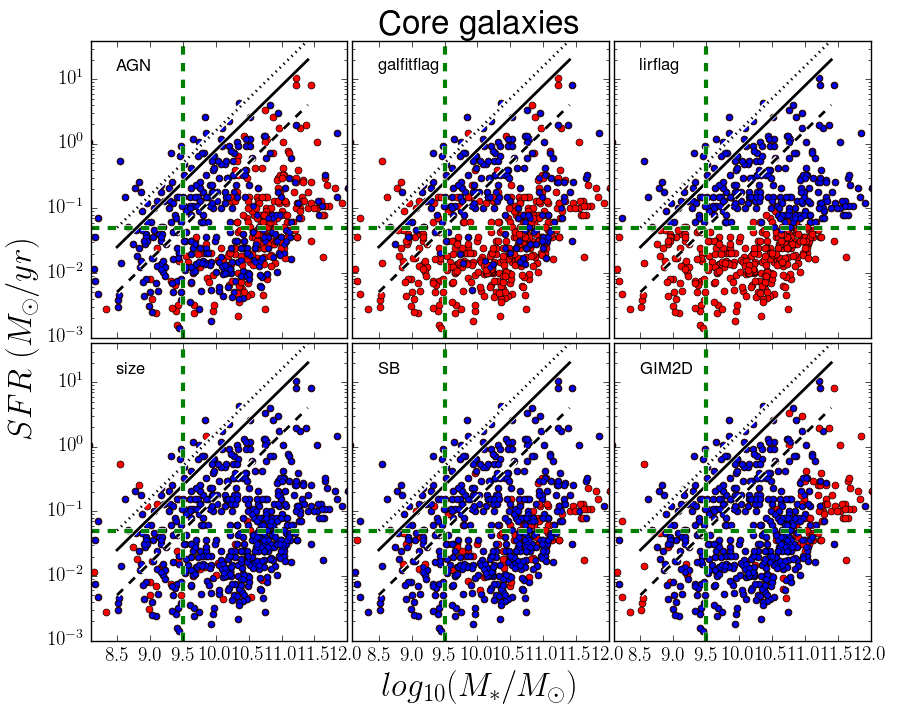

In [45]:
g.plotSFRStellarmasssel(subsample='core')

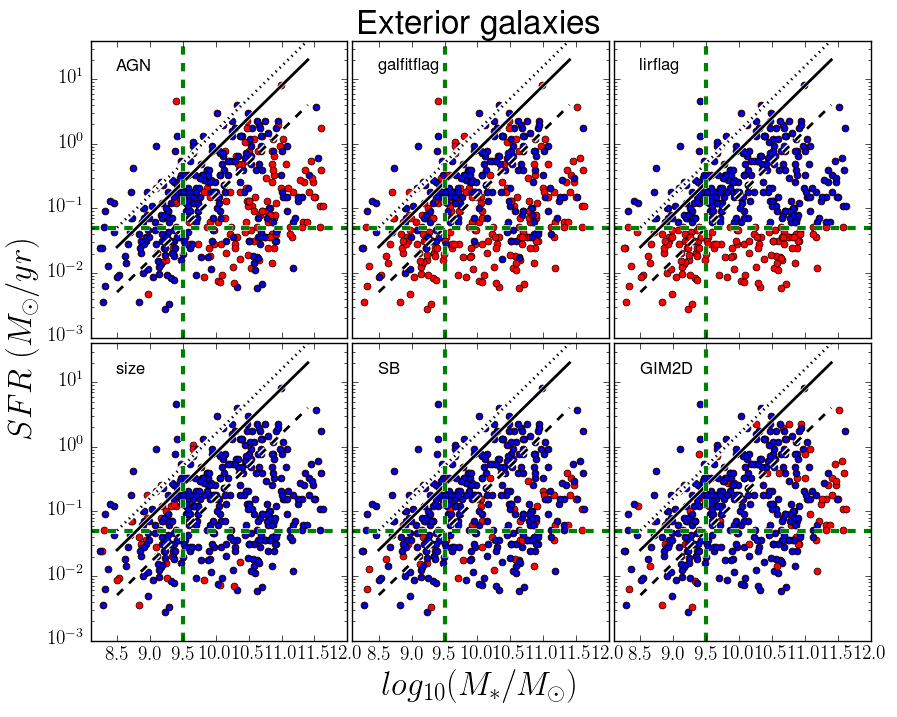

In [46]:
g.plotSFRStellarmasssel('exterior')

## Final Sample
This shows the SFR-$M_*$ distribution for all galaxies and those that pass the final selection.  It seems that making a cut at log($M_*$)>9.5 excludes galaxies at the bottom of the main sequence.  The cut below, at log($M_*)>9.7$ seems to work. The diagonal lines are from Elbaz.  Dotted lines are 2xSFR(MS), solid is SFR(MS), dashed is 0.2SFR(MS).

This seems to show that there isn't any different selection between core and cluster.  However, it does seem that the Elbaz line lies above ours.  I tried to fit our own line but I couldn't get it to work well.  It came out with a pretty flat slope.  I'll probably have to be more picky about what galaxies I fit.

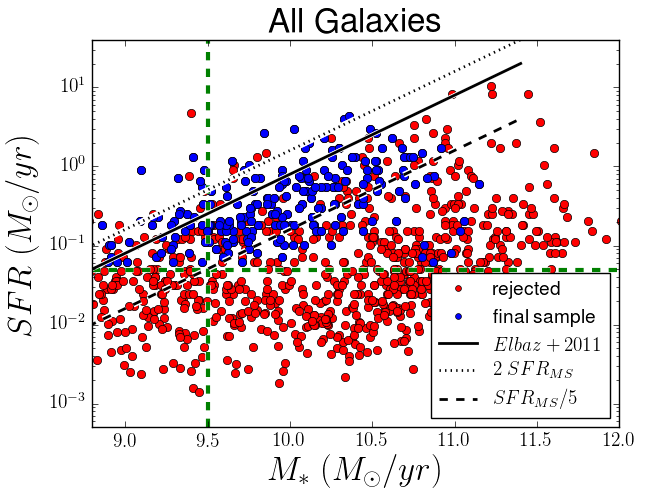

In [47]:
g.plotSFRStellarmassall()
g.plotelbaz()

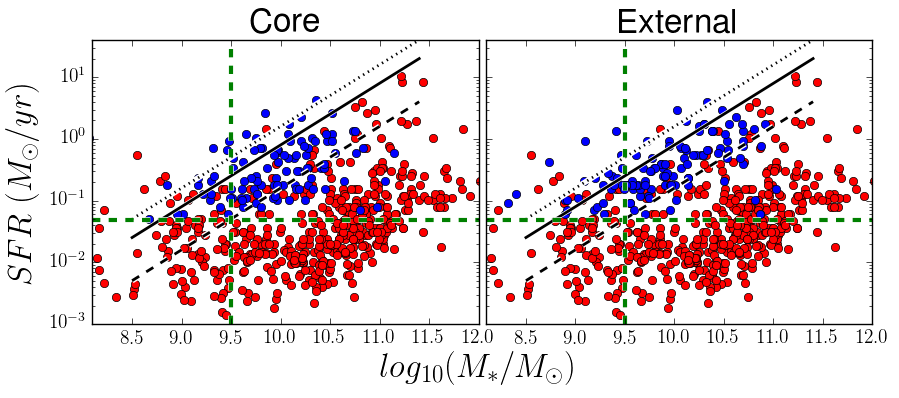

In [48]:
g.plotSFRStellarmassallenv()

## The SFR-mass plot coded by size

On the left I show all the galaxies in our sample and on the right the running median. Both environments have similar median SFRs but different sizes.  The red line is a fit to the non-AGN galaxies above our LIR limit with log(Mstar)>9.5 and with SFR>

****************fit parameters [ 0.84880706 -8.86654478]


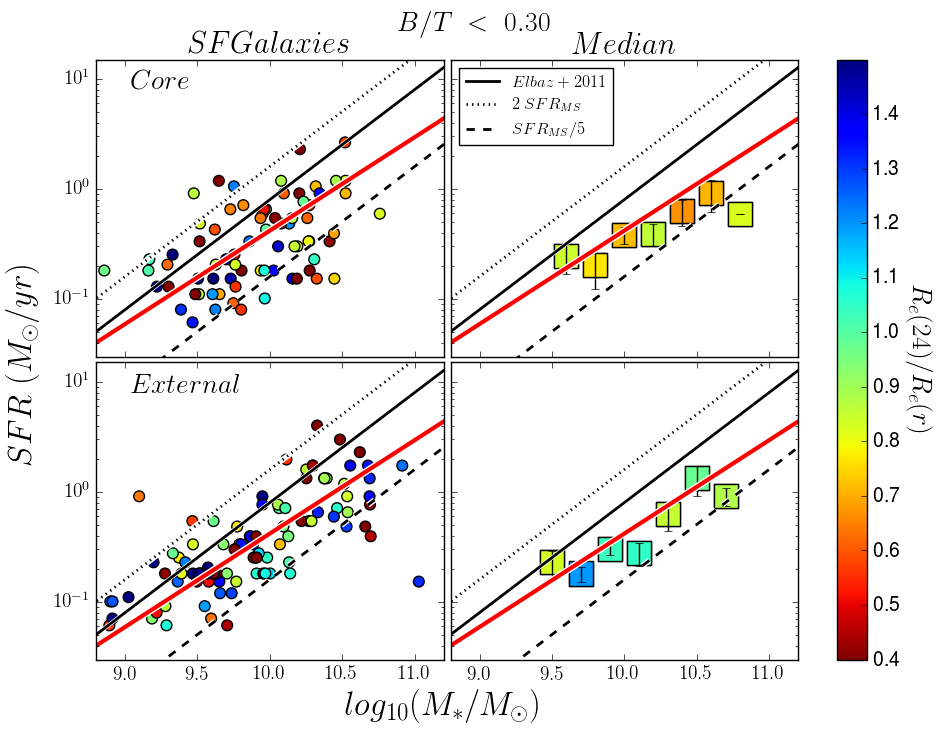

In [50]:
g.plotSFRStellarmassbin()